In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [5]:
df['math score'].unique()

array(['72', '69', '90', '47', '76', '71', '88', '40', '64', '38', '58',
       '65', '78', '50', nan, '74', '73', '67', '70', '62', '63', '56',
       '81', '75', '57', '55', '53', '59', '66', '82', '77', '33', '52',
       '0', '79', '39', '45', '60', '61', '41', '49', '44', '30', '80',
       '42', '27', '43', '68', '85', '98', '87', '54', '51', '99', '84',
       '91', '83', '89', '22', '100', '96', '94', '46', '97', '48', '35',
       '34', '86', '92', '37', '28', '24', '113', '123', '?', '-89', '26',
       '334', '95', '36', '29', '32', '93', '19', '23', '8'], dtype=object)

In [6]:
df = df.drop(df[df['math score'] == '?'].index)
df = df.drop(df[df['math score'] < '0'].index)

In [7]:
df['math score'] = df['math score'].fillna(method="ffill")
df['reading score'] = df['reading score'].fillna(method="ffill")
df['writing score'] = df['writing score'].fillna(method="ffill")

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df['math score'] = df['math score'].astype('int64')
df['reading score'] = df['reading score'].astype('int64')
df['writing score'] = df['writing score'].astype('int64')

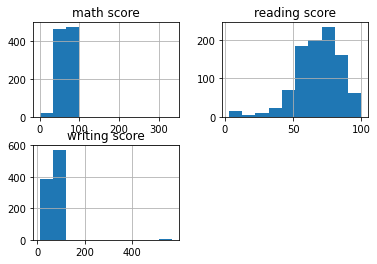

In [10]:
df.hist()
plt.show()

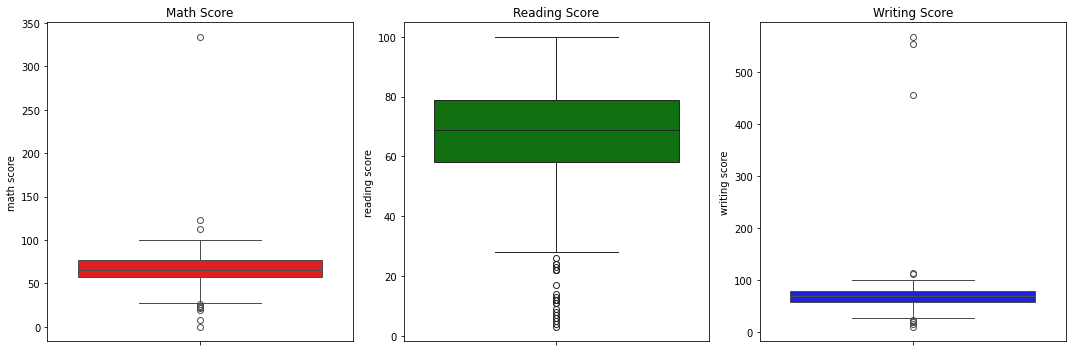

In [11]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(df['math score'], ax=axs[0], color='r')
axs[0].set_title('Math Score')

sns.boxplot(df['reading score'], ax=axs[1], color='g')
axs[1].set_title('Reading Score')

sns.boxplot(df['writing score'], ax=axs[2], color='b')
axs[2].set_title('Writing Score')

plt.tight_layout()
plt.show()

In [12]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['math score'] > lower) & (df['math score'] < upper)]

In [13]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['reading score'] >= lower) & (df['reading score'] <= upper)]

In [14]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['writing score'] > lower) & (df['writing score'] < upper)]

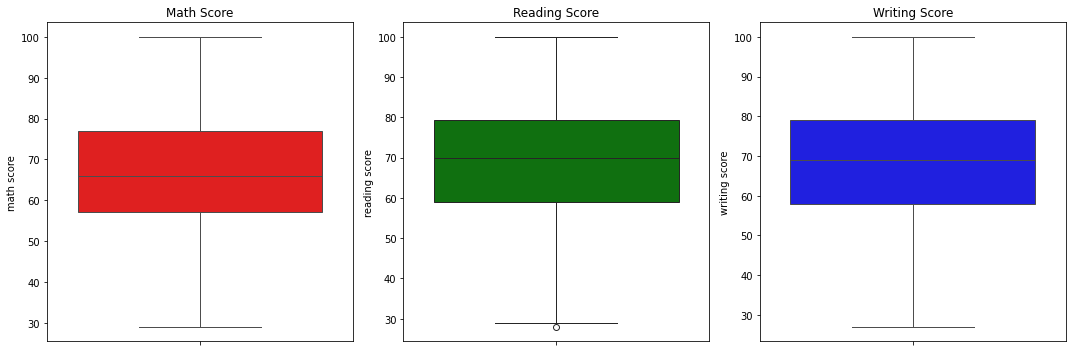

In [15]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(df['math score'], ax=axs[0], color='r')
axs[0].set_title('Math Score')

sns.boxplot(df['reading score'], ax=axs[1], color='g')
axs[1].set_title('Reading Score')

sns.boxplot(df['writing score'], ax=axs[2], color='b')
axs[2].set_title('Writing Score')

plt.tight_layout()
plt.show()

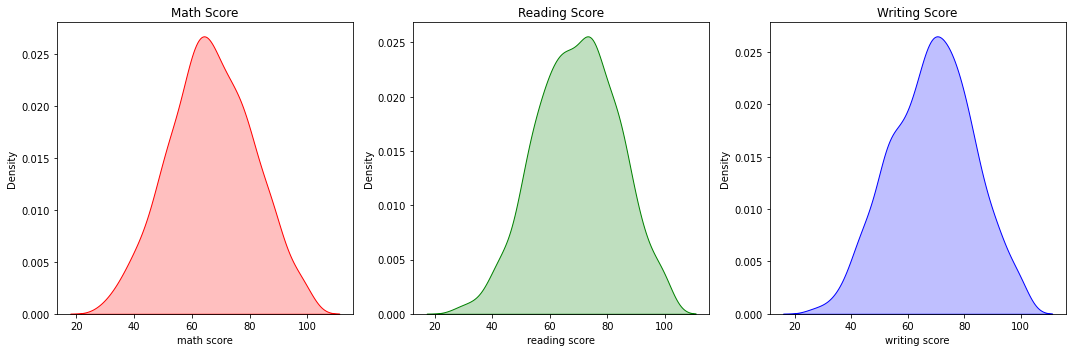

In [16]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

sns.kdeplot(df['math score'], ax=axs[0], color='r', fill=True)
axs[0].set_title('Math Score')

sns.kdeplot(df['reading score'], ax=axs[1], color='g', fill=True)
axs[1].set_title('Reading Score')

sns.kdeplot(df['writing score'], ax=axs[2], color='b', fill=True)
axs[2].set_title('Writing Score')

plt.tight_layout()
plt.show()

In [17]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
619,male,group C,associate's degree,free/reduced,completed,65,73,68
249,male,group C,high school,standard,none,68,60,53
541,male,group D,associate's degree,free/reduced,completed,79,82,80
264,male,group D,high school,standard,none,76,73,68
891,female,group E,associate's degree,standard,none,85,92,85
791,female,group D,some college,free/reduced,none,60,66,70
273,female,group D,some college,standard,none,65,70,71
751,male,group E,some college,standard,none,68,72,65
636,female,group B,high school,free/reduced,completed,67,80,81
967,male,group C,some college,standard,none,63,63,60


In [18]:
df['gender'].replace(['female', 'male'], [0,1], inplace=True)
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
928,1,group E,associate's degree,free/reduced,completed,46,43,44
266,0,group C,bachelor's degree,standard,none,63,75,81
138,0,group C,associate's degree,standard,none,59,66,67
850,1,group C,master's degree,standard,none,71,67,67
244,1,group D,some high school,standard,none,75,74,69
848,0,group C,high school,standard,none,59,72,68
295,1,group B,associate's degree,free/reduced,none,67,62,60
855,0,group B,bachelor's degree,standard,none,97,97,96
296,1,group A,some high school,standard,completed,46,41,43
618,1,group D,master's degree,standard,none,95,81,84


In [19]:
print("Math Score")
print("Skewness Before Transformation : ",df['math score'].skew())
df['math score'] = np.sqrt(df['math score'])
print("Skewness After Transformation : ",df['math score'].skew())

print('Reading Score')
print("Skewness Before Transformation : ",df['reading score'].skew())
df['reading score'] = np.sqrt(df['reading score'])
print("Skewness After Transformation : ",df['reading score'].skew())

print('Writing Score')
print("Skewness Before Transformation : ",df['writing score'].skew())
df['Writing score'] = np.sqrt(df['writing score'])
print("Skewness After Transformation : ",df['writing score'].skew())

Math Score
Skewness Before Transformation :  -0.01432479498955524
Skewness After Transformation :  -0.29831276043040905
Reading Score
Skewness Before Transformation :  -0.10538689774704499
Skewness After Transformation :  -0.3867204040482179
Writing Score
Skewness Before Transformation :  -0.11892502740932523
Skewness After Transformation :  -0.11892502740932523


<Axes: xlabel='writing score', ylabel='Count'>

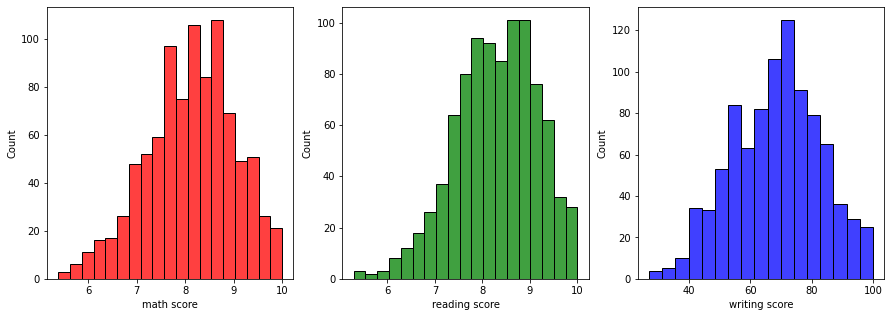

In [20]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

sns.histplot(df['math score'], ax=axs[0], color='r')
sns.histplot(df['reading score'], ax=axs[1], color='g')
sns.histplot(df['writing score'], ax=axs[2], color='b')
